In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("addition_dataset.csv")

In [3]:
data

,x,y,sum
0,40,80,120
1,99,44,143
2,25,49,74
3,56,33,89
4,51,99,150
...,...,...,...
1016,0,0,0
1017,0,0,0
1018,0,0,0
1019,0,0,0


In [4]:
import matplotlib.pyplot as plt

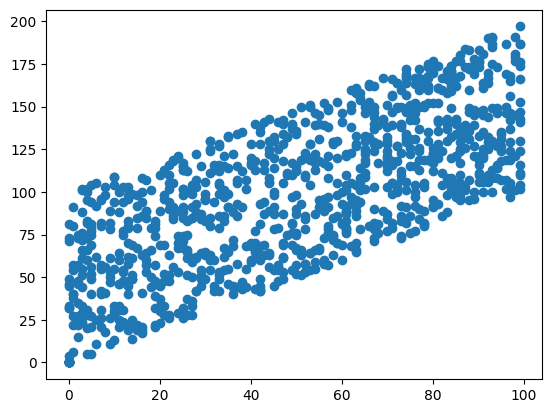

In [5]:
plt.scatter(data["x"],data["sum"])

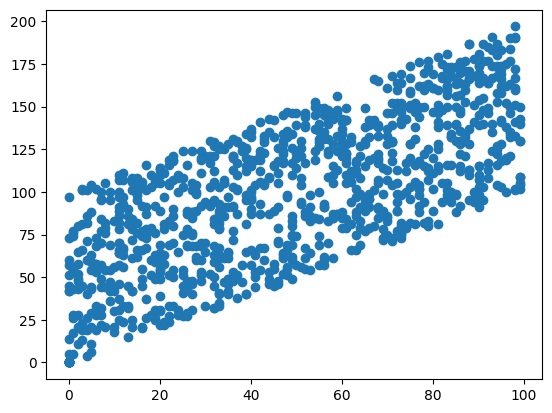

In [6]:
plt.scatter(data["y"], data["sum"])

1. Store Feature Matrix in X and response(target) in Vector y

In [7]:
X = data[["x","y"]]  #independent variables
y = data["sum"]  #dependent variable

2. Train/Test data split
   1. Split data into two part : a training set and a testing set
   2. Train the model on training set
   3. Test the model on testing set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 42)
X_train
# X_train and y_train - Both are used to train the model
# X_test - It is used to test the model
# y_test - It is used to compare the results

,x,y
137,30,33
799,44,64
933,68,49
822,97,59
765,30,35
...,...,...
106,86,24
270,44,62
860,61,49
435,88,7


3. Import and train the model (I am using linear regression)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train.values,y_train.values)  #fit is used to train the model

LinearRegression()

4. Check model's prediction performance

In [12]:
model.score(X_train.values,y_train.values)

1.0

In [13]:
model.score(X_test.values,y_test.values)

1.0

5. Comparing the results

In [14]:
y_predicted = model.predict(X_test.values)
y_predicted

array([135., 120., 174., 143., 162.,  87.,  84., 149.,  98., 128., 177.,
        63.,  97., 132., 113.,  72., 147., 108., 173.,  93.,  42.,  90.,
       138.,  21.,  42., 155.,  96., 101., 150.,  67., 102.,  46.,   0.,
        46., 146., 130., 141.,  70.,  22., 134., 141., 107.,  76., 180.,
        78., 103., 107.,  56.,  87., 134., 132., 114.,  83., 151.,   4.,
       134.,  80.,  95.,  50., 105., 109.,  43.,  91.,  83., 132.,  94.,
        45.,  96., 177., 149.,  75.,  19.,  89.,  51.,  77.,  66.,  30.,
       115., 160., 112., 110., 135.,  69.,  44.,  17., 111., 101.,  24.,
        67.,  75.,  61.,  91., 125., 169.,  92., 104., 132.,  78.,  81.,
        56.,   0.,  70., 190.,  83., 112.,  53., 114., 128.,  72.,  49.,
       100.,  61., 104., 146.,  68.,  62.,  87., 134.,  43.,  97., 140.,
        44., 101., 161., 105., 125.,  73.,  69.,  60.,  62.,  85., 129.,
       150.,  94., 124.,  49.,   0.,  62., 142., 120., 107.,  61., 152.,
        67., 115., 119., 140.,  69., 129.,   0.,  8

In [15]:
y_test

523    135
602    120
526    174
31     143
616    162
      ... 
449    121
783     42
593    133
909    106
743    104
Name: sum, Length: 205, dtype: int64

In [16]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_predicted})

In [17]:
df

,Actual,Predicted
523,135,135.0
602,120,120.0
526,174,174.0
31,143,143.0
616,162,162.0
...,...,...
449,121,121.0
783,42,42.0
593,133,133.0
909,106,106.0


6. Prediction

In [18]:
model.predict([[100.2,20.3]])

array([120.5])

7. Save model using joblib

In [19]:
import joblib
joblib.dump(model,"Add_model")

['Add_model']

In [20]:
model = joblib.load("Add_model")

In [21]:
model.predict([[20,300]])

array([320.])

GUI

In [22]:
import joblib
from customtkinter import *
from tkinter import PhotoImage, messagebox

set_appearance_mode("dark")
set_default_color_theme("dark-blue")

def model_prediction():
    try:
        val1 = float(num1.get())
        val2 = float(num2.get())

        model = joblib.load("Add_model")
        result = str(model.predict([[val1, val2]]))
        
        remove = ["[","]"]
        for substring in remove:
            result = result.replace(substring,"")

        result_label.configure(text=f"Result: {result}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numbers.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def clear_fields():
    num1.delete(0, END)
    num2.delete(0, END)
    result_label.configure(text="Result")

root = CTk()
root.geometry("500x400")
root.title("Add_Model")

# Icon
root.iconbitmap("addition_image.ico")

# Title Label
title_label = CTkLabel(root, text="Adding Two Numbers using Machine Learning", font=("Arial", 20, "bold"))
title_label.pack(padx=20, pady=20)

# Entry for first number
num1 = CTkEntry(root, placeholder_text="Enter first number", width=200, height=30, font=("Arial", 14))
num1.pack(padx=20, pady=10)

# Entry for second number
num2 = CTkEntry(root, placeholder_text="Enter second number", width=200, height=30, font=("Arial", 14))
num2.pack(padx=20, pady=10)

# Predict Button
predict_button = CTkButton(root, text="Predict", command=model_prediction, width=150, height=40, font=("Arial", 14, "bold"))
predict_button.pack(padx=20, pady=10)

# Clear Button
clear_button = CTkButton(root, text="Clear", command=clear_fields, width=150, height=40, font=("Arial", 14, "bold"))
clear_button.pack(padx=20, pady=10)

# Frame for Result
f1 = CTkFrame(root)
f1.pack(pady=20, padx=20)
result_label = CTkLabel(f1, text="Result", font=("Arial", 18))
result_label.pack(padx=80, pady=20)

root.mainloop()
